<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab04_penalized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 - Penalized Regression

### Author: Szymon Nowakowski


# Introduction to Penalization Methods
-----------------------

In many statistical and machine learning problems, overfitting arises when the model learns noise instead of the underlying patterns in the data. Penalization methods address this issue by adding a penalty term to the objective function, discouraging overly complex models. This results in solutions that are simpler and generalize better to unseen data. The rationale for penalization methods lies in controlling the complexity of the model to balance the trade-off between bias and variance. Penalization is also key in feature selection and regularization, where the goal is to identify relevant predictors while mitigating multicollinearity and stabilizing parameter estimates.

## The $\ell_0$ Penalty: Variable Selection

The penalized objective function for $\ell_0$ regression is:

$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_0,
$$

The $\ell_0$ penalty is defined as the count of non-zero coefficients in the regression model:
$$
\|\beta\|_0 = \sum_{j=1}^p \mathbb{1}(\beta_j \neq 0),
$$
where $\beta_j$ is the $j$-th coefficient, and $\mathbb{1}(\cdot)$ is the indicator function and $\lambda > 0$ controls the penalty strength.
The $\ell_0$ penalty directly enforces sparsity by minimizing the number of non-zero coefficients, effectively performing variable selection. However, the $\ell_0$ problem is computationally intractable because it requires solving a combinatorial optimization problem, which is NP-hard. For this reason, alternatives like $\ell_1$ penalization are commonly used.



## The $\ell_1$ Penalty: Lasso
The Lasso (Least Absolute Shrinkage and Selection Operator) method uses the $\ell_1$ norm as the penalty term.

The penalized objective function for Lasso regression is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_1,
$$
with
$$
\|\beta\|_1 = \sum_{j=1}^p |\beta_j|.
$$
where $\lambda > 0$ controls the penalty strength. The $\ell_1$ penalty induces sparsity by shrinking some coefficients exactly to zero, making it effective for variable selection in high-dimensional settings.


## The $\ell_2$ Penalty: Ridge Regression
Ridge regression uses the $\ell_2$ norm as the penalty:
$$
\|\beta\|_2^2 = \sum_{j=1}^p \beta_j^2.
$$
The penalized objective function for ridge regression is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2.
$$ with $\lambda > 0$ controlling the penalty strength.

Unlike Lasso, ridge regression does not induce sparsity but shrinks all coefficients toward zero, making it effective for handling multicollinearity and stabilizing the model when predictors are highly correlated.



## Manifold Perspective for Lasso and Ridge

Both the Lasso and Ridge regression objectives can be interpreted as optimizing the unpenalized sum of squares subject to a constraint (a “manifold”) determined by the penalty. This constrained problem can be solved using the method of Lagrange multipliers, which connects the penalized and constrained formulations. The key difference lies in the shape of the constraint region and how it interacts with the **level curves** (contours) of the unpenalized sum of squares.

Recall the penalized objective:

$$\min_\beta \left[f(\beta) + \lambda g(\beta)\right].$$

Here, $f(\beta)$ represents the sum of squares (e.g., for regression), and $g(\beta) = \|\beta\|$ could be an $\ell_1$ or $\ell_2$ norm.

Since subtracting the constant term $\lambda \cdot c$ does not affect the location of the minimum, this is equivalent to minimizing $L(\beta; \lambda, c)$ with respect to $\beta$, where:


$$L(\beta; \lambda, c) = f(\beta) + \lambda \left(g(\beta) - c\right).$$

$L(\beta; \lambda, c)$ is the Lagrangian of the constrained problem:

$$\min_\beta f(\beta) \quad \text{subject to} \quad g(\beta) \leq c.$$



### Ridge Regression

For Ridge regression, the penalized objective is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2.
$$
Alternatively, it can be written as a constrained optimization problem:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 \quad \text{subject to} \quad \|\beta\|_2^2 \leq c,
$$
where $c$ is the radius of an $\ell_2$ ball.

The Lagrange multiplier $\lambda$ controls the strength of the penalty and relates to $c$ as follows:
- $\lambda$ determines how tightly the solution is constrained.
- Increasing $\lambda$ corresponds to decreasing $c$, shrinking the radius of the feasible region.

In Ridge regression, the feasible region $\{\beta : \|\beta\|_2^2 \leq c\}$ is a smooth sphere. The optimal solution occurs where the **level curves** (elliptical contours) of the unpenalized sum of squares first touch the sphere. Because the sphere is smooth, this contact rarely happens at a coordinate axis, so Ridge regression typically shrinks coefficients but does not force them to exactly zero.

### Lasso

For Lasso regression, the penalized objective is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_1.
$$
Alternatively, it can be written as:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 \quad \text{subject to} \quad \|\beta\|_1 \leq c,
$$
where $c$ is the radius of an $\ell_1$ ball.

The Lagrange multiplier $\lambda$ and the ball radius $c$ are related similarly to Ridge:
- $\lambda$ controls the strength of the penalty.
- Larger $\lambda$ corresponds to a smaller $c$, tightening the constraint.

For Lasso, the feasible region $\{\beta : \|\beta\|_1 \leq c\}$ is an $\ell_1$ ball, which is a polytope (*pl. wielościan*) shaped like a diamond or octahedron. The sharp corners of the polytope lie on coordinate axes. The solution occurs where the **level curves** of the unpenalized sum of squares first touch the polytope. Because the first contact often occurs at a corner, Lasso tends to shrink some coefficients exactly to zero, producing a sparse solution.



### Relationship Between $\lambda$ and $c$

In both Lasso and Ridge, $\lambda$ and $c$ are not equal but are related through the optimization problem. Specifically:
- $\lambda$ appears in the penalized formulation and determines the relative importance of the penalty term.
- $c$ defines the size of the constraint region in the constrained formulation. For any given  $\lambda$ , there exists a corresponding  $c$  such that the penalized and constrained formulations yield the same solution. This relationship is determined implicitly by the optimization problem.

**Larger $\lambda$ corresponds to a smaller $c$ and *vice-versa*.**


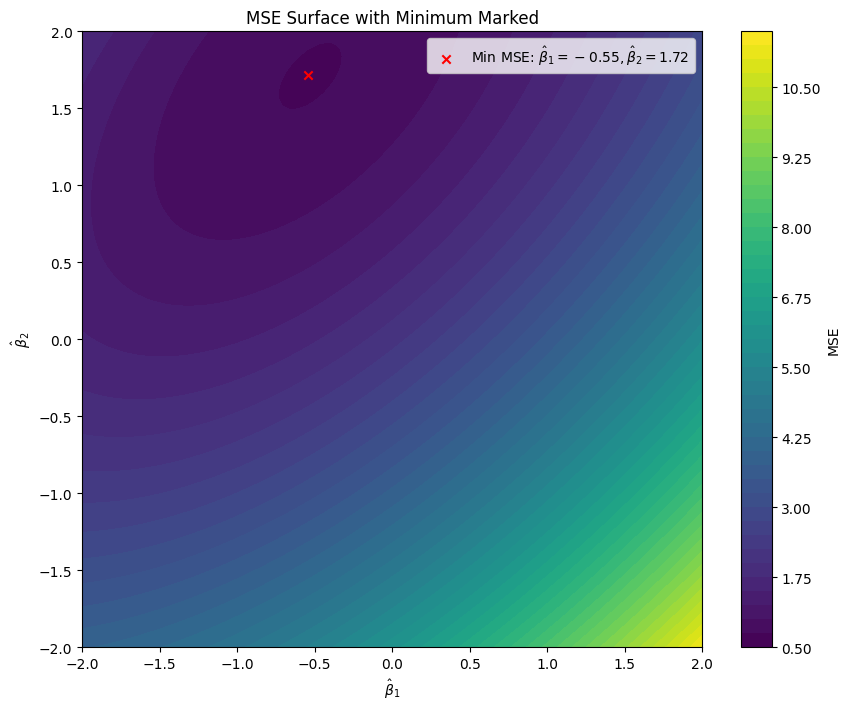

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fictional regression problem
def mse(beta_1, beta_2, X1, X2, y):
    """Calculate MSE for given beta_0, beta_1."""
    y_pred = beta_1 * X1 + beta_2 * X2
    return np.mean((y - y_pred) ** 2)

# Generate some synthetic data for the regression
np.random.seed(42)
X1 = np.random.uniform(-1, 1, 20)
X2 = np.random.uniform(-1, 1, 20)

true_beta_1 = -1.0
true_beta_2 = 1.0

y = true_beta_1 * X1 + true_beta_2 * X2 + np.random.normal(scale=1.0, size=len(X1))

# Create a grid of beta_0 and beta_1 values
beta_1_range = np.linspace(-2, 2, 100)
beta_2_range = np.linspace(-2, 2, 100)
beta_1_grid, beta_2_grid = np.meshgrid(beta_1_range, beta_2_range)

# Compute MSE values for the grid
mse_values = np.zeros_like(beta_1_grid)
for i in range(beta_1_grid.shape[0]):
    for j in range(beta_1_grid.shape[1]):
        mse_values[i, j] = mse(beta_1_grid[i, j], beta_2_grid[i, j], X1, X2, y)

# Find the minimum MSE and its location
min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_beta_1 = beta_1_grid[min_idx]
min_beta_2 = beta_2_grid[min_idx]

# Plot the MSE surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(beta_1_grid, beta_2_grid, mse_values, levels=50, cmap='viridis')
plt.colorbar(contour, label="MSE")

# Mark the minimum MSE location with a large X
plt.scatter(min_beta_1, min_beta_2, color='red', marker='x', label=rf"Min MSE: $\hat\beta_1={min_beta_1:.2f}, \hat\beta_2={min_beta_2:.2f}$")



# Add labels and legend
plt.xlabel(r"$\hat\beta_1$")
plt.ylabel(r"$\hat\beta_2$")
plt.title("MSE Surface with Minimum Marked")
plt.legend()
plt.show()


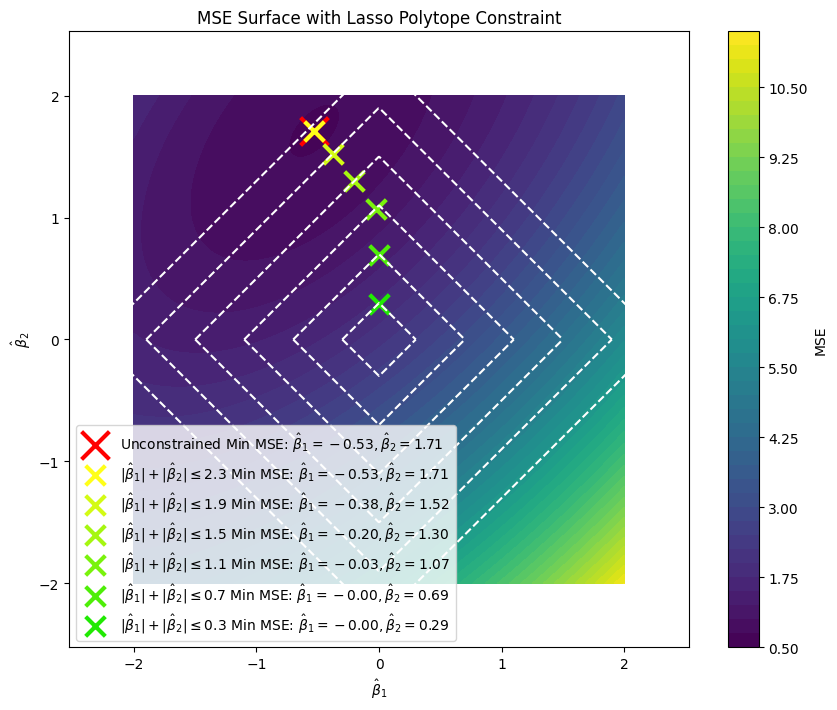

In [2]:
# Create a FINER grid of beta_0 and beta_1 values
beta_1_range = np.linspace(-2, 2, 1000)
beta_2_range = np.linspace(-2, 2, 1000)
beta_1_grid, beta_2_grid = np.meshgrid(beta_1_range, beta_2_range)

# Compute MSE values for the grid
mse_values = np.zeros_like(beta_1_grid)
for i in range(beta_1_grid.shape[0]):
    for j in range(beta_1_grid.shape[1]):
        mse_values[i, j] = mse(beta_1_grid[i, j], beta_2_grid[i, j], X1, X2, y)

# Find the minimum MSE and its location
min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_beta_1 = beta_1_grid[min_idx]
min_beta_2 = beta_2_grid[min_idx]

# Plot the MSE surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(beta_1_grid, beta_2_grid, mse_values, levels=50, cmap='viridis')
plt.colorbar(contour, label="MSE")

# Mark the minimum MSE location (unconstrained) with a red X
plt.scatter(min_beta_1, min_beta_2, color='red', marker='x', s=400, linewidths=3, label=rf"Unconstrained Min MSE: $\hat\beta_1={min_beta_1:.2f}, \hat\beta_2={min_beta_2:.2f}$")

max_c = 2.3

# color codes https://rgbcolorcode.com/
# Define the colors
electric_green = np.array([0, 230, 0])
laser_lemon = np.array([255, 255, 25])

for lasso_c in np.arange(max_c, 0, -0.4):
    # Compute the blended color (the colors span green-yellow range)
    col = laser_lemon * (lasso_c / max_c) + electric_green * (1 - lasso_c / max_c)
    # Normalize RGB values to [0, 1] for Matplotlib
    col = col / 255.0

    # Apply the Lasso constraint |β_1| + |β_2| <= c
    lasso_constraint = np.abs(beta_1_grid) + np.abs(beta_2_grid) <= lasso_c
    constrained_mse = np.where(lasso_constraint, mse_values, np.inf)
    constrained_min_idx = np.unravel_index(np.argmin(constrained_mse), mse_values.shape)
    constrained_min_beta_1 = beta_1_grid[constrained_min_idx]
    constrained_min_beta_2 = beta_2_grid[constrained_min_idx]


    # Mark the constrained minimum within the Lasso polytype with a violet X
    plt.scatter(constrained_min_beta_1, constrained_min_beta_2, color=col, marker='x', s=200, linewidths=3, label=rf"$| \hat\beta_1 | + | \hat\beta_2 | \leq {lasso_c:.1f}$ Min MSE: $\hat\beta_1={constrained_min_beta_1:.2f}, \hat\beta_2={constrained_min_beta_2:.2f}$")

    # Plot the Lasso polytopes (|β_1| + |β_2| = c)
    lasso_boundary = np.linspace(-lasso_c, lasso_c, 500)  # Boundary along the |β_1| axis

    # Top and bottom boundaries
    plt.plot(lasso_boundary, lasso_c - np.abs(lasso_boundary), color='white', linestyle='--')
    plt.plot(lasso_boundary, -lasso_c + np.abs(lasso_boundary), color='white', linestyle='--')

# Add labels and legend
plt.xlabel(r"$\hat\beta_1$")
plt.ylabel(r"$\hat\beta_2$")
plt.title("MSE Surface with Lasso Polytope Constraint")
plt.legend()
plt.show()


## Group Lasso
The **group Lasso** extends Lasso to encourage **groupwise sparsity**. Suppose the parameters $\beta$ are partitioned into groups $\{G_1, G_2, \dots\}$. Then we impose:

$$
\sum_{g} \|\beta_{G_g}\|_2
$$

as the penalty, where $\beta_{G_g}$ are the coefficients for group $g$. Minimizing:

$$
\sum_{i=1}^n \left(y_i - x_i^\top \beta\right)^2 + \lambda \sum_{g} \|\beta_{G_g}\|_2.
$$


The penalty $\sum_{g} \|\beta_{G_g}\|_2$ combines two behaviors:
1. **Between-group penalty $\leftrightarrow \ell_1$**

  The penalty sums the Euclidean norms of each group, $\|\beta_{G_g}\|_2$. This structure effectively treats each group’s norm as a *single scalar variable*—much like the $\ell_1$ norm $\|\beta\|_1 = \sum_{j=1}^p |\beta_j| $ treats each coefficient (under a module) as a scalar. Minimizing the sum of these block norms is equivalent to applying an $\ell_1$ penalty on each group’s size in the sense that some entire block norms may be driven to zero (thus “kicking out” all coefficients in that group).

  In other words, *between groups*, it acts like lasso: a group is either entirely nonzero or entirely zero.

2. **Within-group penalty $\leftrightarrow \ell_2$**

  Once a block $\beta_{G_g}$ is nonzero, its contribution to the penalty is simply $\|\beta_{G_g}\|_2$. That doesn’t drive any individual coefficient to exactly zero within the group. Instead, it shrinks the group as a whole, distributing the penalty across the block just like a *ridge penalty* distributes shrinkage across coefficients.


  Hence *within a group*, the penalty is reminiscent of ridge regression: all coefficients in that block get shrunk together but typically remain nonzero (as long as that block is “selected”).


If groups are irrelevant, the $\ell_1$ penalty zeros out all coefficients for those groups. For groups retained in the solution, the $\ell_2$ penalty prevents individual coefficients within the group from being arbitrarily zeroed out, providing a balance between group selection and regularization.

Concrete examples include selecting entire subsets of correlated predictors in finance (grouping by sector) or picking all polynomial terms of a given variable together in polynomial expansions.



# Summary
-------------------------

| **Technique**      | **Category**       | **Key Behavior**                                       | **Bias**
|---------------------|--------------------|-------------------------------------------------------|----|
|OLS Regression| Unregularized Full Model |  Fits a model to minimize the residual sum of squares without any penalty term. | Unbiased estimator: $\mathbb{E}[\hat{\beta}] = \beta$
| $\ell_0$ Penalty | Model Selection    | Enforces exact sparsity by directly selecting variables. | Bias arises specifically from the hard thresholding (zeroing out coefficients), but larger coefficients are typically left unmodified.
| $\ell_1$ Penalty (Lasso)| Model Selection/Regularization     | Shrinks some coefficients to zero, regularizing and selecting variables. | Also biased, as it shrinks coefficients toward zero, with small coefficients often shrunk to exactly zero.
| $\ell_2$ Penalty (Ridge)| Regularization     | Shrinks coefficients proportionally without enforcing sparsity. |Ridge introduces bias by reducing the magnitude of all coefficients but does not zero them out.
| Group Lasso        | Model Selection/Regularization     | Performs group-level selection by excluding entire groups. | The bias arises from the nature of the penalty, which encourages sparsity at the group level and shrinkage within groups.


# The California Housing Dataset
----------------------------

The California Housing dataset is a standard real-world dataset included in `sklearn.datasets`. It features 20,640 instances and 8 numerical features. It is commonly used in regression tasks to predict housing prices based on various socio-economic and geographical factors. Below is a detailed description:

1. **Target Variable**  
The target variable is **MedianHouseValue**, which represents the median house price (in $100,000s) for a given California district.

2. **Predictors**  
The dataset includes 8 numerical features that describe various characteristics of California districts:

    **MedInc**: Median income of the district (scaled).  
    **HouseAge**: Median age of the district's houses.  
    **AveRooms**: Average number of rooms per household.  
    **AveBedrms**: Average number of bedrooms per household.  
    **Population**: Total population in the district.  
    **AveOccup**: Average number of occupants per household.  
    **Latitude**: Geographical latitude of the district.  
    **Longitude**: Geographical longitude of the district.

# `LassoCV` from `scikit-learn`
-----------------------------------

In `scikit-learn` implementation of `LassoCV`, the optimization problem is written as:

$$\min_\beta \frac{1}{2n} \|y - X\beta\|_2^2 + \alpha \|\beta\|_1.$$

You can think of it this way: in `scikit-learn`, $\alpha$ is used instead of $\lambda$ to represent the regularization strength. It is related to $\lambda$ by a scaling factor that depends on the number of samples $n$:

$$\alpha = \frac{\lambda}{n}.$$


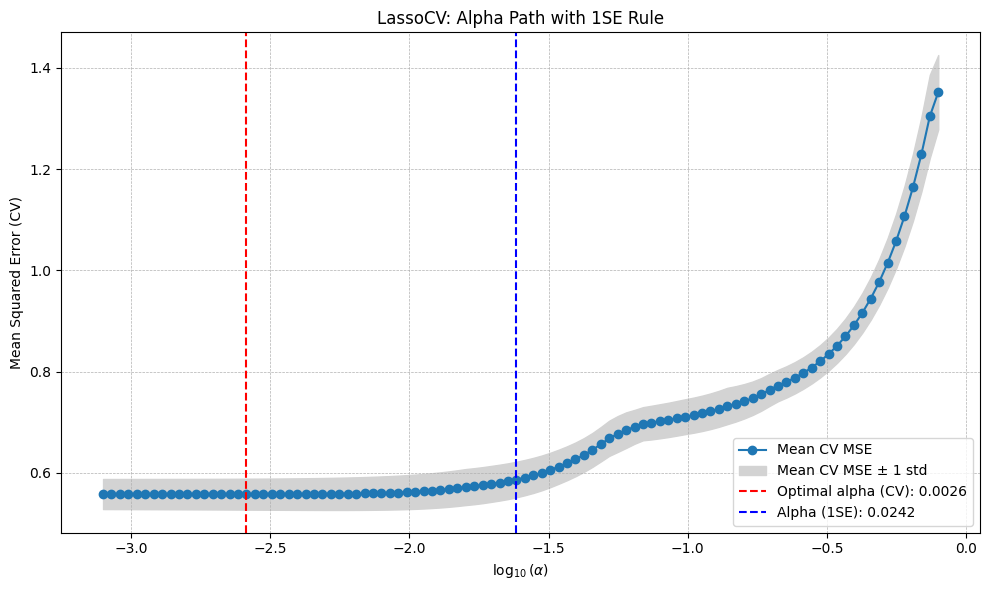

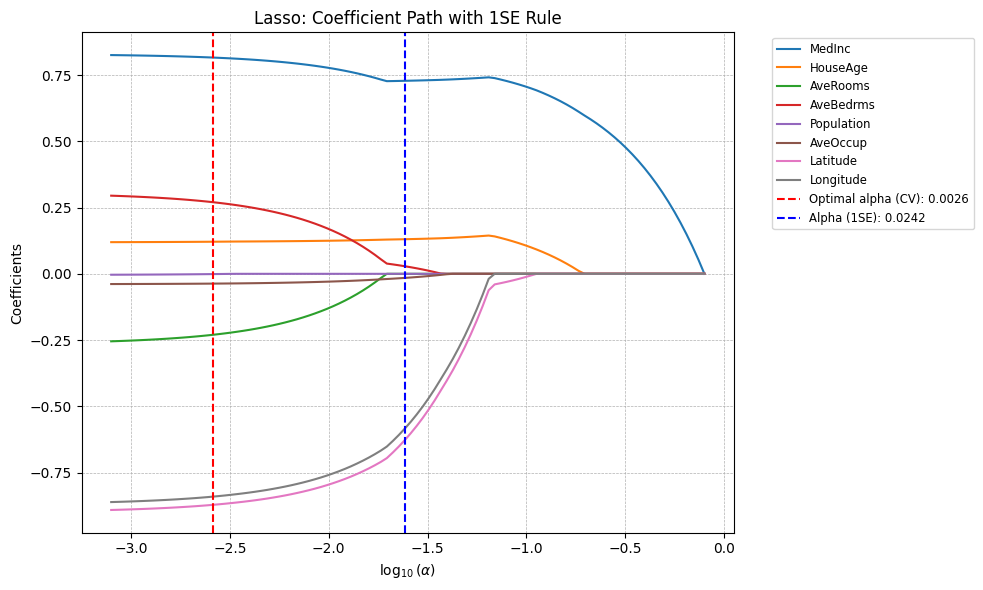

Optimal alpha: 0.0026
Alpha (1SE): 0.0242
Number of selected features (CV): 8
Number of selected features (1SE): 6
Selected Features (CV): ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Selected Features (1SE): ['MedInc', 'HouseAge', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data  # Features
y = housing.target  # Target variable
feature_names = housing.feature_names  # Feature names

# Step 2: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Fit LassoCV with cross-validation
n_folds = 5
lasso = LassoCV(cv=n_folds, random_state=42).fit(X, y)

# Extract alphas (regularization path) and MSE path
alphas = lasso.alphas_  # All alpha values tested, they are in descending order for some reason
mse_path = lasso.mse_path_  # Cross-validated MSE for each alpha

# Step 4: Compute the 1SE estimate
mean_mse = mse_path.mean(axis=1)
std_mse = mse_path.std(axis=1) / np.sqrt(n_folds) #      (glmnet uses std / sqrt(#folds) to get standard error)
min_mse = mean_mse.min()
min_mse_idx = np.argmin(mean_mse)
min_mse_std = std_mse[min_mse_idx]

# 1SE Rule: Select the **largest alpha** where MSE is within 1 standard deviation of the minimum MSE
valid_alphas = alphas[mean_mse <= (min_mse + min_mse_std)]
alpha_1se = valid_alphas[0]  # Largest alpha within 1SE

# Step 5: Plot the alpha path
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), mean_mse, label="Mean CV MSE", marker="o")
plt.fill_between(
    np.log10(alphas),
    mean_mse - std_mse,
    mean_mse + std_mse,
    color="lightgray",
    label="Mean CV MSE ± 1 std",
)
plt.axvline(np.log10(lasso.alpha_), color="red", linestyle="--", label=f"Optimal alpha (CV): {lasso.alpha_:.4f}")
plt.axvline(np.log10(alpha_1se), color="blue", linestyle="--", label=f"Alpha (1SE): {alpha_1se:.4f}")
plt.xlabel(r"$\log_{10}(\alpha)$")
plt.ylabel("Mean Squared Error (CV)")
plt.title("LassoCV: Alpha Path with 1SE Rule")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 6: Compute coefficient paths manually (this is really bad)
coefficient_paths = []
for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_temp.fit(X, y)
    coefficient_paths.append(lasso_temp.coef_)

coefficient_paths = np.array(coefficient_paths)

# Step 7: Plot Coefficient Path
plt.figure(figsize=(10, 6))
for i in range(len(feature_names)):
    plt.plot(np.log10(alphas), coefficient_paths[:, i], label=f"{feature_names[i]}")

plt.axvline(np.log10(lasso.alpha_), color="red", linestyle="--", label=f"Optimal alpha (CV): {lasso.alpha_:.4f}")
plt.axvline(np.log10(alpha_1se), color="blue", linestyle="--", label=f"Alpha (1SE): {alpha_1se:.4f}")
plt.xlabel(r"$\log_{10}(\alpha)$")
plt.ylabel("Coefficients")
plt.title("Lasso: Coefficient Path with 1SE Rule")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 8: Print the selected features
print(f"Optimal alpha: {lasso.alpha_:.4f}")
print(f"Alpha (1SE): {alpha_1se:.4f}")
selected_features_cv = np.where(lasso.coef_ != 0)[0]

# Refit Lasso with alpha_1se to identify selected features
lasso_1se = Lasso(alpha=alpha_1se, max_iter=10000, random_state=42).fit(X, y)
selected_features_1se = np.where(lasso_1se.coef_ != 0)[0]

print(f"Number of selected features (CV): {len(selected_features_cv)}")
print(f"Number of selected features (1SE): {len(selected_features_1se)}")
print(f"Selected Features (CV): {[feature_names[i] for i in selected_features_cv]}")
print(f"Selected Features (1SE): {[feature_names[i] for i in selected_features_1se]}")


## Applying the 1SE Rule (Inspired by `glmnet` in R)

When applying the 1SE rule, we follow a methodology similar to `glmnet` in R, which uses the standard error (SE) across folds at the alpha yielding the **minimum mean MSE** to define the "1SE" threshold. Among all alphas whose mean MSE is within this threshold, we select the **largest alpha** (i.e., the most regularized solution). Below is a step-by-step breakdown:

1. In `glmnet`, the "1SE" refers to the standard error:
   $$
   \text{SE} = \frac{\text{std (MSE)}}{\sqrt{\text{folds}}}
   $$
   calculated across the folds for the alpha that achieves the **minimum mean MSE**.

2. The **MSE threshold** is then defined as:
   $$
   \text{MSE threshold} = \text{minimum mean MSE} + \text{SE}.
   $$

3. Finally, the **1SE alpha** is the largest alpha where:
   $$
   \text{mean MSE} \leq \text{MSE threshold}.
   $$
   This ensures a simpler, more regularized solution while maintaining predictive accuracy within acceptable bounds.


## Lasso plots

As you can see, there are no standard plots in `scikit-learn`. You need to do your plots manually. You can try to use a `glmnet_py` - a port of `glmnet` from R. However, I was not able to make it work.

# The Thresholded Lasso
--------------------------

The **Thresholded Lasso** is an extension of the standard Lasso regression designed to improve variable selection and predictive accuracy. While Lasso effectively shrinks some coefficients to exactly zero, it can still include variables with small, nonzero coefficients that may not contribute meaningfully to the model. The Thresholded Lasso addresses this by applying an additional thresholding step to refine the selection of variables.

The procedure involves three main steps:
1. **Model Fitting**: Fit the Lasso regression model and determine the optimal regularization parameter $\lambda$.
2. **Thresholding**: Apply a threshold to the absolute values of the coefficients $\beta$, setting those below a specified threshold to zero.
3. **Debiasing**: Refit OLS regression model using only the variables with nonzero coefficients after thresholding.

This three-step process helps eliminate variables with weak contributions, reduce potential biases introduced by the Lasso's regularization, and construct a more interpretable and accurate final model.




## Work Plan

**Dataset Split**:
- Split the data into training (60%), validation (20%), and testing (20%) sets to ensure robust evaluation.

**Lasso Model**:
- Fit a LassoCV model on the training set to find the optimal regularization parameter $\alpha$ and coefficients.

**Thresholding on Validation Set**:
- Validate a range of thresholds (for thresholding Lasso) on the validation set. Use an exponential progression.
- For each threshold, set coefficients smaller than the threshold to zero.
- Fit a new OLS model using the nonzero coefficients and calculate the validation MSE.
- Select the threshold that minimizes the validation MSE.

**Debiasing (OLS Refit)**:
- Refit a final OLS model using the selected features determined by the best threshold. **Refit that on training and validation sets combined.**
- This step reduces the bias introduced by Lasso’s regularization.

**Evaluation**:
- Evaluate the final model on the test set using Mean Squared Error (MSE).
- Create a bar chart to visualize the original Lasso coefficients versus the thresholded coefficients.


Lasso step - cross validated alpha = 0.0009102621082166303
Features retained by Lasso: 8
  MedInc: 0.8483828764544391
  HouseAge: 0.12038413628446777
  AveRooms: -0.30365757561510165
  AveBedrms: 0.3745362674531116
  Population: -0.0002782175159189587
  AveOccup: -0.03283848487393682
  Latitude: -0.883814739260899
  Longitude: -0.8585338415182164


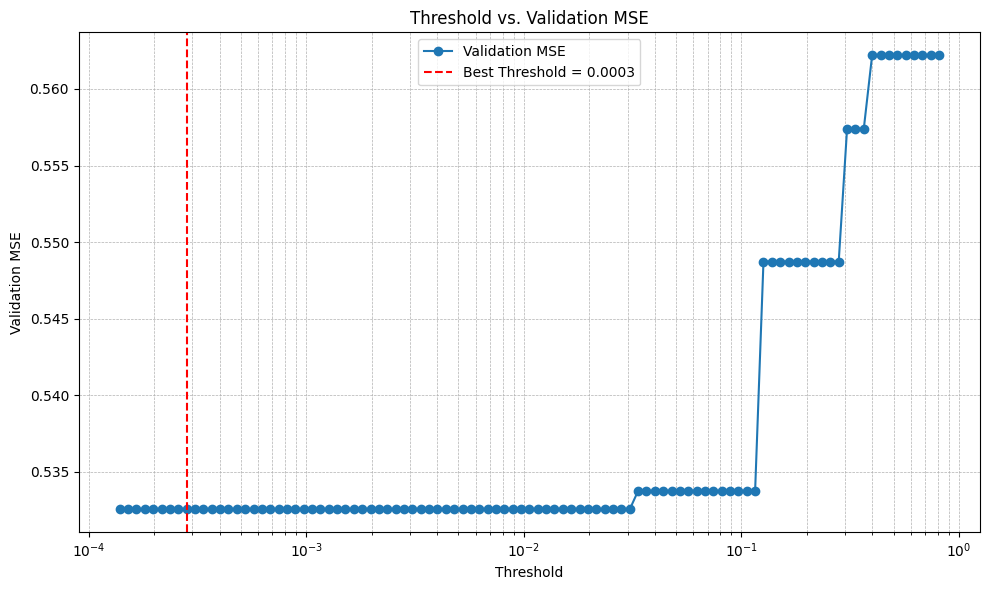

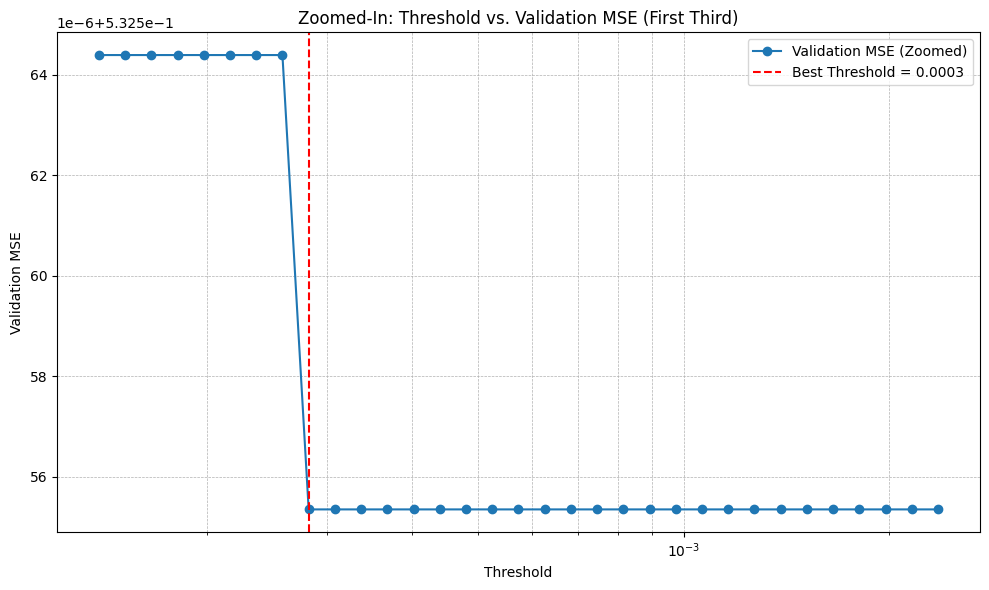

Best Threshold: 0.0003
Validation MSE: 0.5326
Test MSE (Thresholded OLS): 0.5514
Features retained by Lasso: 8: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Features additionally removed by thresholding: ['Population']
Features retained by Thresholded Lasso: 7: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data  # Features
y = california.target  # Target variable (median house value)
feature_names = X.columns  # Feature names

# Step 2: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% each for validation and testing

# Step 4: Fit the Lasso model on the training set
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Extract optimal alpha and coefficients
optimal_alpha = lasso.alpha_
lasso_coefs = lasso.coef_

lasso_selected_features = np.where(lasso_coefs != 0)[0]

print(rf"Lasso step - cross validated alpha = {optimal_alpha}")
print(f"Features retained by Lasso: {len(lasso_selected_features)}")

for i, coef in enumerate(lasso_coefs):
    if coef != 0:
        print(f"  {feature_names[i]}: {coef}")
    else:
        print(f"  {feature_names[i]}: REMOVED")

# Step 5: Apply thresholding on the validation set
thresholds = np.geomspace(min(np.abs(lasso_coefs[np.abs(lasso_coefs) > 0]) / 2.0), max(np.abs(lasso_coefs)), 100)  # Explore various thresholds in an exponential progression
threshold_mse = []  # To store threshold and corresponding MSE
best_threshold = None
best_mse = float('inf')

for threshold in thresholds:
    thresholded_coefs = np.where(np.abs(lasso_coefs) > threshold, lasso_coefs, 0)
    selected_features = np.where(thresholded_coefs != 0)[0]

    if len(selected_features) > 0:  # Ensure some features remain
        X_val_selected = X_val[:, selected_features]
        ols = LinearRegression().fit(X_train[:, selected_features], y_train)
        y_val_pred = ols.predict(X_val_selected)
        mse_val = mean_squared_error(y_val, y_val_pred)

        threshold_mse.append((threshold, mse_val))  # Store threshold and MSE
        if mse_val < best_mse:
            best_mse = mse_val
            best_threshold = threshold

# Convert threshold_mse to arrays for plotting
thresholds_plot, mse_plot = zip(*threshold_mse)

# Plot Threshold vs. Validation MSE
plt.figure(figsize=(10, 6))
plt.plot(thresholds_plot, mse_plot, marker='o', label="Validation MSE")
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Best Threshold = {best_threshold:.4f}")
plt.xscale('log')
plt.xlabel("Threshold")
plt.ylabel("Validation MSE")
plt.title("Threshold vs. Validation MSE")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot Zoomed-In Chart (First Third of Threshold Progression)
zoomed_thresholds_plot = thresholds_plot[:len(thresholds_plot) // 3]
zoomed_mse_plot = mse_plot[:len(thresholds_plot) // 3]

plt.figure(figsize=(10, 6))
plt.plot(zoomed_thresholds_plot, zoomed_mse_plot, marker='o', label="Validation MSE (Zoomed)")
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Best Threshold = {best_threshold:.4f}")
plt.xscale('log')
plt.xlabel("Threshold")
plt.ylabel("Validation MSE")
plt.title("Zoomed-In: Threshold vs. Validation MSE (First Third)")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 6: Refit OLS using the best threshold
thresholded_coefs = np.where(np.abs(lasso_coefs) > best_threshold, lasso_coefs, 0)
selected_features = np.where(thresholded_coefs != 0)[0]
removed_by_thresholding = set(lasso_selected_features) - set(selected_features)



X_combined_selected_features = np.concatenate([X_train, X_val], axis=0)[:, selected_features]
y_combined = np.concatenate([y_train, y_val], axis=0)
X_test_selected_features = X_test[:, selected_features]

ols = LinearRegression().fit(X_combined_selected_features, y_combined)
y_test_pred = ols.predict(X_test_selected_features)

# Evaluate the final model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Map removed features and retained features back to their names
retained_by_lasso_feature_names = [feature_names[i] for i in lasso_selected_features]
retained_feature_names = [feature_names[i] for i in selected_features]
removed_feature_names = [feature_names[i] for i in removed_by_thresholding]

# Print results
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Validation MSE: {best_mse:.4f}")
print(f"Test MSE (Thresholded OLS): {mse_test:.4f}")
print(f"Features retained by Lasso: {len(lasso_selected_features)}: {retained_by_lasso_feature_names}")
print(f"Features additionally removed by thresholding: {removed_feature_names}")
print(f"Features retained by Thresholded Lasso: {len(selected_features)}: {retained_feature_names}")


# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.
